# Visualization And Methodology

In [28]:
import pandas as pd

# Introduction
This is the data from 2013-2019 and 2022-2023. (Missing data fro 2020 to 2021 since the COVID epidemic) Using pd.read_csv() function to read the csv file exported from the previous part.

In [29]:
#read data
df=pd.read_csv("processed.csv")
df

,Name,Age,Age_group,Time (min),Gender,Pace (min/Km),Speed (Km/h),Distance,Year
0,William Liu,19,10 - 19,16.250,Male,3.250,18.462,5K,2023
1,Chris Badolato,46,40 - 49,16.983,Male,3.397,17.665,5K,2023
2,Matthew Mayo,31,30 - 39,17.033,Male,3.407,17.613,5K,2023
3,Liam Lopez,18,10 - 19,17.500,Male,3.500,17.143,5K,2023
4,Ethan Mccracken,16,10 - 19,18.017,Male,3.603,16.651,5K,2023
...,...,...,...,...,...,...,...,...,...
4046,Andrea Kirsch,50,50 - 59,48.033,Female,4.803,12.491,10K,2013
4047,Gary Campbell,58,50 - 59,48.067,Male,4.807,12.483,10K,2013
4048,Tim Ojima,49,40 - 49,49.200,Male,4.920,12.195,10K,2013
4049,Eleanor Su,23,20 - 29,48.300,Female,4.830,12.422,10K,2013


# Question 1
Which age group have the minimum and maximum average speed and pace？

# Maximum Average Speed

In [30]:
#PART I: Maximum averge speed for age group
#Calculate the averge speed for each group
avg_speed=df.groupby("Age_group")['Speed (Km/h)'].mean()
print("Average Speed for Each Age Group:")
print(avg_speed)

group=avg_speed.idxmax() #get the age group for the maximum average speed
value=avg_speed.max() #get the maximum speed among the average speed
group1=avg_speed.idxmin() #get the age group for the minimum average speed
value1=avg_speed.min() #get the minimum speed among the average speed

#print out the result
print('\n')
print("The age group for maximum average speed is",group)
print("The maximum average speed for",group,"is",value)
print('\n')
print("The age group for minimum average speed is",group1)
print("The minimum average speed for",group1,"is",value1)

Average Speed for Each Age Group:
Age_group
10 - 19    10.653362
20 - 29    10.378087
30 - 39     9.907945
40 - 49     9.608170
50 - 59     9.554777
60 - 69     8.376220
70 - 79     7.774164
80 - 89     6.743519
< 10        8.523794
> 90        6.396000
Name: Speed (Km/h), dtype: float64


The age group for maximum average speed is 10 - 19
The maximum average speed for 10 - 19 is 10.65336170212766


The age group for minimum average speed is > 90
The minimum average speed for > 90 is 6.396000000000001


# Maximum Average Pace

In [31]:
#PART II: Maximum average Pace for each age group

#Calculate the average pace for all age group
avg_pace=df.groupby("Age_group")['Pace (min/Km)'].mean()
print("Average Pace for Each Age Group:")
print(avg_pace)

grp=avg_pace.idxmax() #get the age group for the maximum average pace
val=avg_pace.max() #get the maximum speed among the average pace
grp1=avg_pace.idxmin() #get the age group for the minimum average pace
val1=avg_pace.min() #get the minimum speed among the average pace

#print out the result
print('\n')
print("The age group for maximum average pace is",grp)
print("The maximum average pace for",grp,"is",val)
print('\n')
print("The age group for minimum average pace is",grp1)
print("The minimum average pace for",grp1,"is",val1)


Average Pace for Each Age Group:
Age_group
10 - 19    6.135798
20 - 29    6.259797
30 - 39    6.559876
40 - 49    6.751231
50 - 59    6.803352
60 - 69    7.724759
70 - 79    8.225527
80 - 89    9.491926
< 10       7.656850
> 90       9.661333
Name: Pace (min/Km), dtype: float64


The age group for maximum average pace is > 90
The maximum average pace for > 90 is 9.661333333333333


The age group for minimum average pace is 10 - 19
The minimum average pace for 10 - 19 is 6.135797872340425


# Question 2
For the same running distance (5k,10k), what is the speed difference between female and male within the same age group?

# 5K distance difference Gender

In [32]:
#PART I: 5k distance

#Extract a new data frame with distance as 5k
df_5k=df.loc[(df['Distance']=='5K')]

# Group by 'Age_group' and 'Gender' and calculate the sum of speeds
sum_speeds_by_age_gender = df_5k.groupby(['Age_group', 'Gender'])['Speed (Km/h)'].sum()

# Unstack to create a new DataFrame with 'Age_group' as rows and 'Gender' as columns
sum_speeds_df = sum_speeds_by_age_gender.unstack()

# Calculate the difference between the summed speeds for females and males in each age group
speed_difference_by_age = sum_speeds_df['Female'] - sum_speeds_df['Male']

# Print out the result
print("Speed Difference between Female and Male for Each Age Group:")
print(speed_difference_by_age)
print('\n')

# Group by 'Age_group' and 'Gender' and calculate the sum of pace
sum_pc_by_age_gender = df_5k.groupby(['Age_group', 'Gender'])['Pace (min/Km)'].sum()

# Unstack to create a new DataFrame with 'Age_group' as rows and 'Gender' as columns
sum_pc_df = sum_pc_by_age_gender.unstack()

# Calculate the difference between the summed pace for females and males in each age group
pc_difference_by_age = sum_pc_df['Female'] - sum_pc_df['Male']

# Print out the result
print("Pace Difference between Female and Male for Each Age Group:")
print(pc_difference_by_age)
print('\n')

Speed Difference between Female and Male for Each Age Group:
Age_group
10 - 19   -683.279
20 - 29    580.016
30 - 39    376.440
40 - 49    367.856
50 - 59     91.236
60 - 69    -51.293
70 - 79   -125.728
80 - 89     48.054
< 10      -179.288
> 90        -9.234
dtype: float64


Pace Difference between Female and Male for Each Age Group:
Age_group
10 - 19    -210.270
20 - 29     775.554
30 - 39     823.816
40 - 49    1004.716
50 - 59     704.389
60 - 69     483.249
70 - 79      94.059
80 - 89      97.099
< 10        -84.148
> 90         -4.870
dtype: float64




# 10K distance difference Gender

In [33]:
#PART II: 10k distance

#Extract a new data frame with distance as 10k
df_10k=df.loc[(df['Distance']=='10K')]


# Group by 'Age_group' and 'Gender' and calculate the sum of speeds
sum_speeds_by_age_gender1 = df_10k.groupby(['Age_group', 'Gender'])['Speed (Km/h)'].sum()

# Unstack to create a new DataFrame with 'Age_group' as rows and 'Gender' as columns
sum_speeds_df1 = sum_speeds_by_age_gender1.unstack()

# Calculate the difference between the summed speeds for females and males in each age group
speed_difference_by_age1 = sum_speeds_df1['Female'] - sum_speeds_df1['Male']

# Print out the result
print("Speed Difference between Female and Male for Each Age Group:")
print(speed_difference_by_age1)
print('\n')


# Group by 'Age_group' and 'Gender' and calculate the sum of pace
sum_pc_by_age_gender1 = df_10k.groupby(['Age_group', 'Gender'])['Pace (min/Km)'].sum()

# Unstack to create a new DataFrame with 'Age_group' as rows and 'Gender' as columns
sum_pc_df1 = sum_pc_by_age_gender1.unstack()

# Calculate the difference between the summed pace for females and males in each age group
pc_difference_by_age1 = sum_pc_df1['Female'] - sum_pc_df1['Male']

# Print out the result
print("Pace Difference between Female and Male for Each Age Group:")
print(pc_difference_by_age1)
print('\n')

Speed Difference between Female and Male for Each Age Group:
Age_group
10 - 19    -38.358
20 - 29    189.980
30 - 39   -589.934
40 - 49    106.569
50 - 59   -925.363
60 - 69    -45.871
70 - 79   -240.163
80 - 89    -14.806
< 10       -62.438
dtype: float64


Pace Difference between Female and Male for Each Age Group:
Age_group
10 - 19    -18.985
20 - 29    370.804
30 - 39    196.579
40 - 49    527.907
50 - 59   -135.625
60 - 69    120.200
70 - 79   -145.823
80 - 89     -1.456
< 10       -35.463
dtype: float64




# Question 3
Before and after COVID epidemic (two year), is there a significant difference with the  average speed and pace? If there is explain it, what does this result tell us? (before: 2018-2019 after: 2022-2023)

    - Separate for difference distance (5k,10k)
    - Gender speed and pace difference?
    - Age group speed and pace difference?

# 5k distance difference
 (notice: number of row for before and after data frame are not the same)

In [34]:
#Extract the data frame with 5k distance with the year
before=df_5k.loc[(df_5k["Year"].between(2018, 2019))].reset_index(drop=True)
after=df_5k.loc[(df_5k["Year"].between(2022, 2023))].reset_index(drop=True)

#Check the number of row and column for both before and after data
print(before.shape)
print(after.shape)
print('\n')

#difference for Gender with average SPEED
spdb=before.groupby('Gender')['Speed (Km/h)'].mean()
spda=after.groupby('Gender')['Speed (Km/h)'].mean()
dif_spd=spdb-spda
print("The average speed difference between female and male is",'\n',dif_spd)
print('\n')

#difference for Gender with average PACE
pcb=before.groupby('Gender')['Pace (min/Km)'].mean()
pca=after.groupby('Gender')['Pace (min/Km)'].mean()
dif_pc=pcb-pca
print("The average pace difference between female and male is",'\n',dif_pc)
print('\n')

#difference for Age group with average SPEED
spdb1=before.groupby('Age_group')['Speed (Km/h)'].mean()
spda1=after.groupby('Age_group')['Speed (Km/h)'].mean()
dif_spd1=spdb1-spda1
print("The average speed difference for each age group is",'\n',dif_spd1)
print('\n')

#difference for Age group with average PACE
pcb1=before.groupby('Age_group')['Pace (min/Km)'].mean()
pca1=after.groupby('Age_group')['Pace (min/Km)'].mean()
dif_pc1=pcb1-pca1
print("The average pace difference for each age group is",'\n',dif_pc1)
print('\n')


(543, 9)
(660, 9)


The average speed difference between female and male is 
 Gender
Female        0.005749
Male          0.153357
No Answer          NaN
Non-Binary         NaN
Name: Speed (Km/h), dtype: float64


The average pace difference between female and male is 
 Gender
Female       -0.049368
Male         -0.272540
No Answer          NaN
Non-Binary         NaN
Name: Pace (min/Km), dtype: float64


The average speed difference for each age group is 
 Age_group
10 - 19   -0.429759
20 - 29   -0.171736
30 - 39    0.087056
40 - 49    0.655589
50 - 59    0.090198
60 - 69    0.153445
70 - 79   -0.184722
80 - 89    0.466500
< 10       0.068848
> 90            NaN
Name: Speed (Km/h), dtype: float64


The average pace difference for each age group is 
 Age_group
10 - 19    0.116404
20 - 29    0.194068
30 - 39   -0.173105
40 - 49   -0.774715
50 - 59   -0.080833
60 - 69   -0.084070
70 - 79    0.025453
80 - 89   -1.104250
< 10      -0.220780
> 90            NaN
Name: Pace (min/Km), dtype: fl

# 10k distance difference
(notice: the number row for before and after are mostly the same)

In [35]:
#Extract the data frame with 5k distance with the year
before1=df_10k.loc[(df_10k["Year"].between(2018, 2019))].reset_index(drop=True)
after1=df_10k.loc[(df_10k["Year"].between(2022, 2023))].reset_index(drop=True)

#Check the number of row and column for both before and after data
print(before1.shape)
print(after1.shape)
print('\n')

#difference for Gender with average SPEED
spdb2=before1.groupby('Gender')['Speed (Km/h)'].mean()
spda2=after1.groupby('Gender')['Speed (Km/h)'].mean()
dif_spd2=spdb2-spda2
print("The average speed difference between female and male is",'\n',dif_spd2)
print('\n')

#difference for Gender with average PACE
pcb2=before1.groupby('Gender')['Pace (min/Km)'].mean()
pca2=after1.groupby('Gender')['Pace (min/Km)'].mean()
dif_pc2=pcb2-pca2
print("The average pace difference between female and male is",'\n',dif_pc2)
print('\n')

#difference for Age group with average SPEED
spdb3=before1.groupby('Age_group')['Speed (Km/h)'].mean()
spda3=after1.groupby('Age_group')['Speed (Km/h)'].mean()
dif_spd3=spdb3-spda3
print("The average speed difference for each age group is",'\n',dif_spd3)
print('\n')

#difference for Age group with average PACE
pcb3=before1.groupby('Age_group')['Pace (min/Km)'].mean()
pca3=after1.groupby('Age_group')['Pace (min/Km)'].mean()
dif_pc3=pcb3-pca3
print("The average pace difference for each age group is",'\n',dif_pc3)
print('\n')

(355, 9)
(354, 9)


The average speed difference between female and male is 
 Gender
Female     0.186511
Male       0.245551
Unknown         NaN
Name: Speed (Km/h), dtype: float64


The average pace difference between female and male is 
 Gender
Female    -0.224696
Male      -0.102597
Unknown         NaN
Name: Pace (min/Km), dtype: float64


The average speed difference for each age group is 
 Age_group
10 - 19   -0.641071
20 - 29    0.681982
30 - 39    0.027174
40 - 49   -0.014343
50 - 59    0.317659
60 - 69    0.435013
70 - 79    0.899151
80 - 89         NaN
< 10            NaN
Name: Speed (Km/h), dtype: float64


The average pace difference for each age group is 
 Age_group
10 - 19    0.556733
20 - 29   -0.292585
30 - 39   -0.064599
40 - 49    0.074803
50 - 59   -0.292470
60 - 69   -0.483934
70 - 79   -0.888040
80 - 89         NaN
< 10            NaN
Name: Pace (min/Km), dtype: float64




# Visualization

# Boxplot for Age group

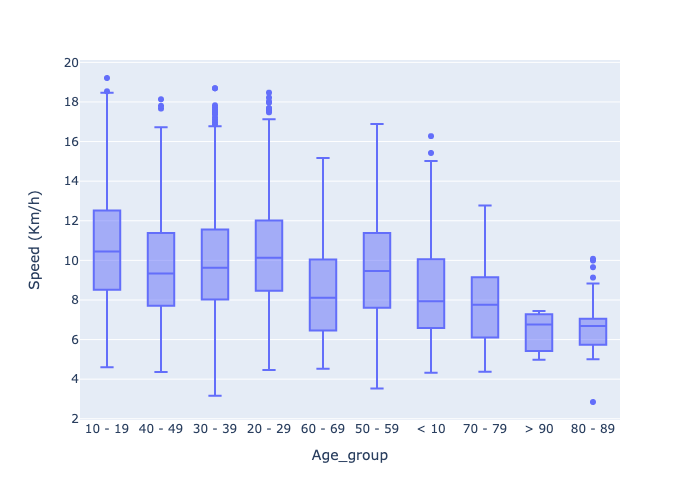

In [36]:
import plotly.express as px
from IPython.display import Image
import plotly.io as pio

#Boxplot for Speed
fig = px.box(df, x="Age_group", y="Speed (Km/h)")
fig.show()

# Export the image to a BytesIO object
img_bytes_speed = pio.to_image(fig, format='png')

# Display the image in the notebook using IPython's Image class
Image(img_bytes_speed)

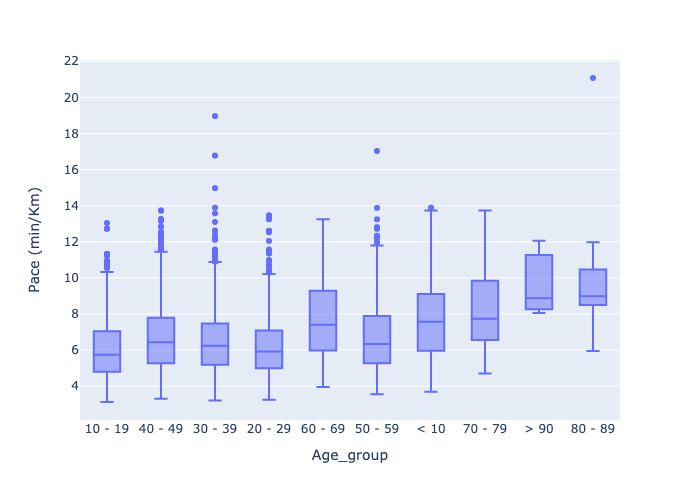

In [37]:
#Boxplot for Pace
fig1 = px.box(df, x="Age_group", y="Pace (min/Km)")
fig1.show()

# Export the image to a BytesIO object
img_bytes_pace = pio.to_image(fig1, format='png')

# Display the image in the notebook using IPython's Image class
Image(img_bytes_pace)

# Boxplot for Gender

(Notice: there is only one "Non-Binary" Gender answer)

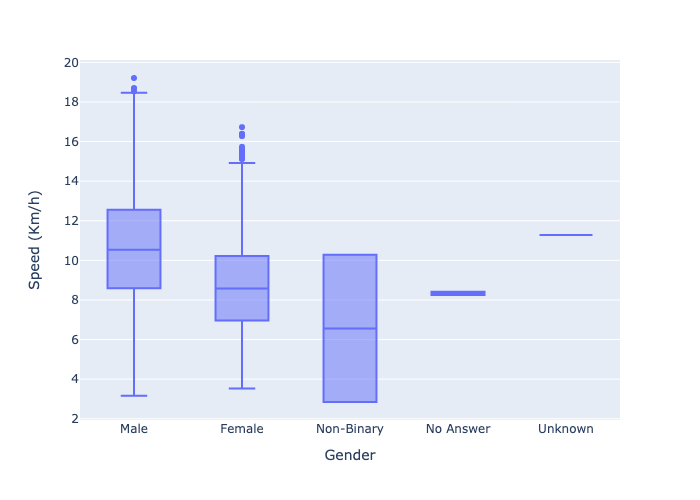

In [38]:
#Boxplot for Speed
fig3 = px.box(df, x="Gender", y="Speed (Km/h)")
fig3.show()

# Export the image to a BytesIO object
img_bytes_speed1 = pio.to_image(fig3, format='png')

# Display the image in the notebook using IPython's Image class
Image(img_bytes_speed1)

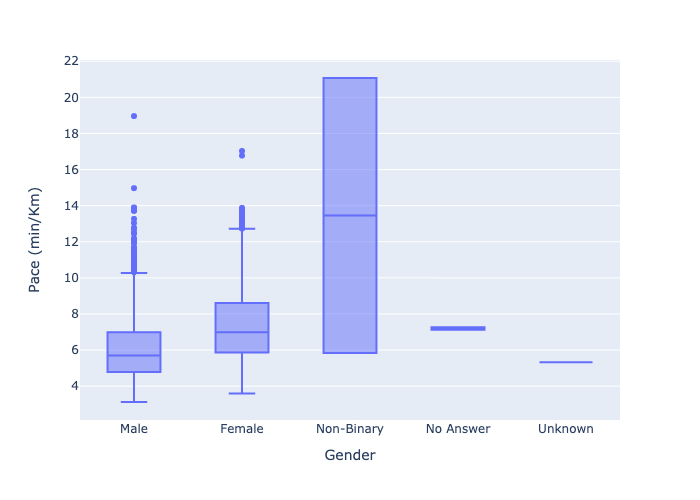

In [39]:

#Boxplot for Pace
fig4 = px.box(df, x="Gender", y="Pace (min/Km)")
fig4.show()

# Export the image to a BytesIO object
img_bytes_speed2 = pio.to_image(fig4, format='png')

# Display the image in the notebook using IPython's Image class
Image(img_bytes_speed2)

# Trendline and Scatter plot 

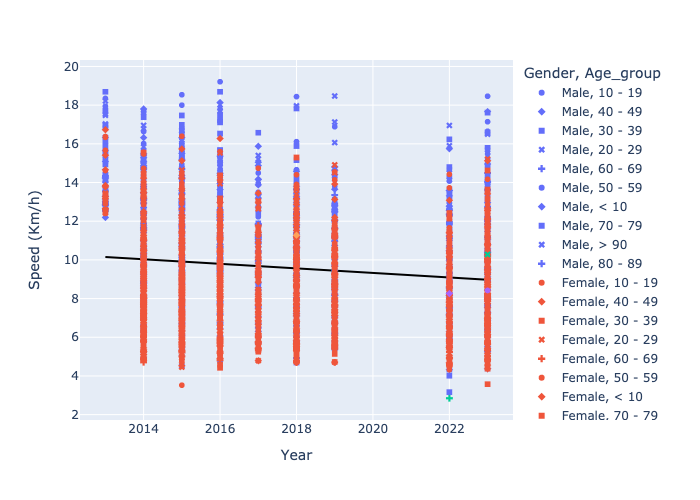

In [40]:
#Trendline and Scatter plot for Speed
fig5 = px.scatter(df, x="Year", y="Speed (Km/h)", symbol="Age_group", color="Gender", 
                  trendline="ols", trendline_scope="overall", trendline_color_override="black")
fig5.show()

# Export the image to a BytesIO object
img_bytes_speed3 = pio.to_image(fig5, format='png')

# Display the image in the notebook using IPython's Image class
Image(img_bytes_speed3)

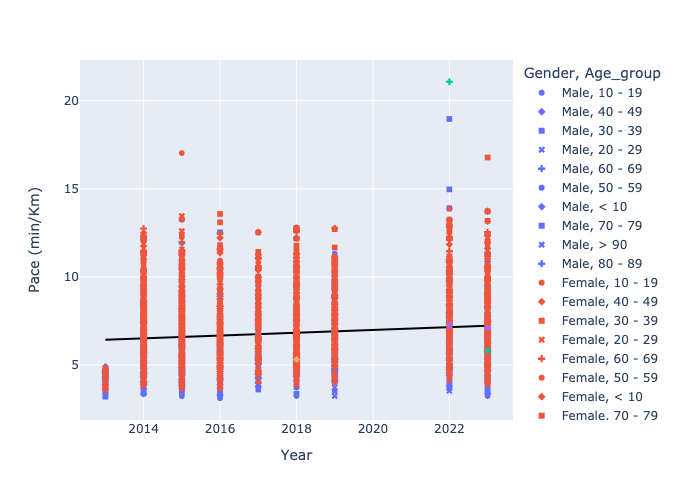

In [41]:
#Trendline and Scatter plot for Pace
fig6 = px.scatter(df, x="Year", y="Pace (min/Km)", symbol="Age_group", color="Gender", 
                  trendline="ols", trendline_scope="overall", trendline_color_override="black")
fig6.show()

# Export the image to a BytesIO object
img_bytes_speed4 = pio.to_image(fig6, format='png')

# Display the image in the notebook using IPython's Image class
Image(img_bytes_speed4)